In [5]:
# initialize stuff
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys

import numpy as np
import matplotlib.pyplot as plt

# import theory stuff
sys.path.append("/Users/oliver/Documents/p5control-bluefors-evaluation")
sys.path.append("/home/oliver/Documents/p5control-bluefors-evaluation")

from theory.utilities.cpd import cmap

In [6]:
from theory.utilities.constants import G_0_muS

V = np.linspace(-3, 3, 501, dtype="float64")
dV = (np.max(V) - np.min(V)) / (V.shape[0] - 1)

tau = 0.5
G_N = 0.1
Delta_meV = 0.18
gamma_meV = 1e-4  # 1e-1
T_K = 0.1
A_mV = 0.1
nu_GHz = 20.0

V_mV = V * Delta_meV
dV_mV = dV * Delta_meV

from theory.models.bcs import Delta_meV_of_T

Delta_T_meV = Delta_meV_of_T(Delta_meV=Delta_meV, T_K=T_K)

In [7]:
from theory.models.bcs import get_I_nA as get_I_nA_bcs

I_nA_bcs = get_I_nA_bcs(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_bcs = np.gradient(I_nA_bcs, V_mV) / G_0_muS

Text(0.5, 0.98, 'BCS')

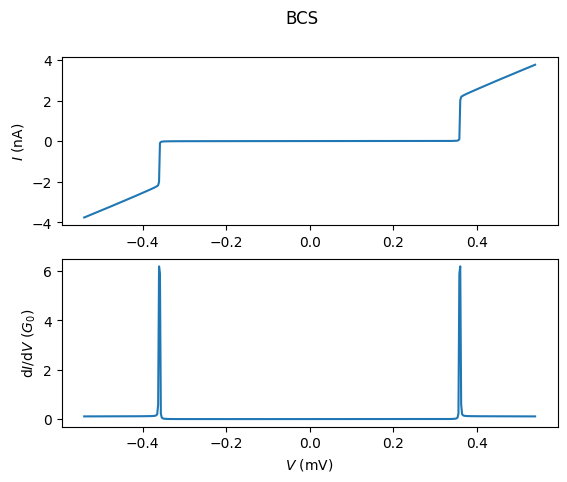

In [8]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_bcs)
ax_didv.plot(V_mV, dIdV_bcs)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")
fig.suptitle("BCS")

In [9]:
from theory.models.bcs_jnp import get_I_nA as get_I_nA_bcs_jnp

I_nA_bcs_jnp = get_I_nA_bcs_jnp(
    V_mV=V_mV,
    Delta_meV=(0.0, Delta_meV),
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_bcs_jnp = np.gradient(I_nA_bcs_jnp, V_mV) / G_0_muS

INFO:2025-12-19 11:28:08,860:jax._src.xla_bridge:812: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/opt/homebrew/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/lib/libtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)
Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/oliver/.pyenv/versions/3.13.3/lib/libtpu.so' (no suc

Text(0.5, 0.98, 'BCS (jax)')

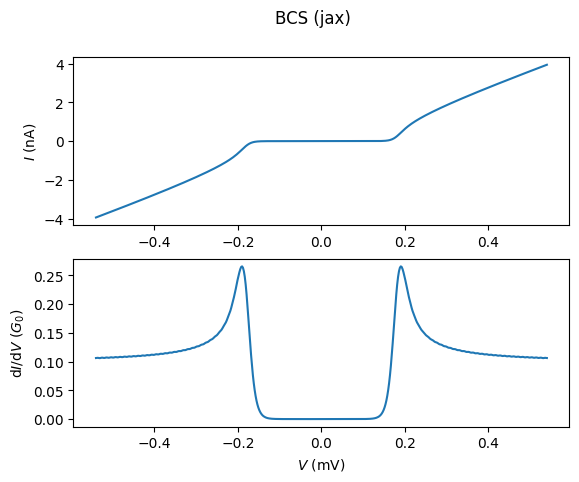

In [10]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_bcs_jnp)
ax_didv.plot(V_mV, dIdV_bcs_jnp)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")
fig.suptitle("BCS (jax)")

In [11]:
from theory.models.btk import get_I_nA as get_I_nA_btk

I_nA_btk = get_I_nA_btk(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_btk = np.gradient(I_nA_btk, V_mV, axis=0) / G_0_muS

Text(0.5, 0.98, 'BTK')

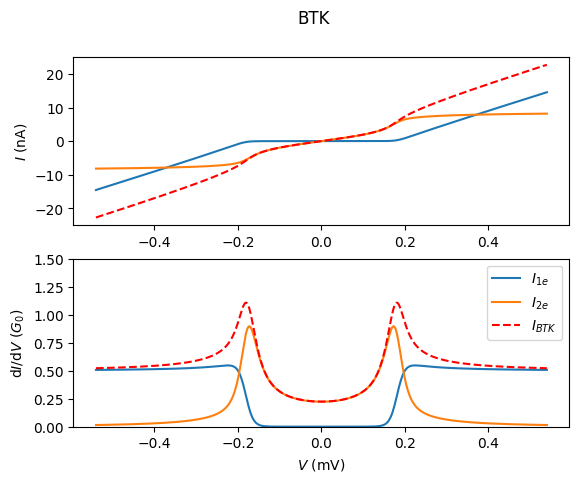

In [12]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_btk[:, 1], label="$I_{1e}$")
ax_iv.plot(V_mV, I_nA_btk[:, 2], label="$I_{2e}$")
ax_iv.plot(V_mV, I_nA_btk[:, 0], "r--", label="$I_{BTK}$")
ax_didv.plot(V_mV, dIdV_btk[:, 1], label="$I_{1e}$")
ax_didv.plot(V_mV, dIdV_btk[:, 2], label="$I_{2e}$")
ax_didv.plot(V_mV, dIdV_btk[:, 0], "r--", label="$I_{BTK}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

ax_didv.set_ylim(0, 3 * tau)
ax_didv.legend()
fig.suptitle("BTK")

In [13]:
from theory.models.ha_asym import get_I_nA as get_I_nA_ha_asym

I_nA_ha = get_I_nA_ha_asym(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_ha = np.gradient(I_nA_ha, V_mV) / G_0_muS

Text(0.5, 0.98, 'HA (asym)')

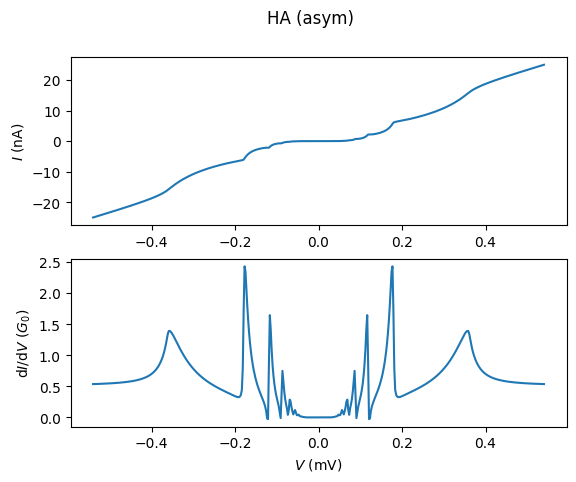

In [14]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_ha)
ax_didv.plot(V_mV, dIdV_ha)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")
fig.suptitle("HA (asym)")

In [15]:
from theory.models.ha_sym import get_I_nA as get_I_nA_ha_sym

I_nA_ha = get_I_nA_ha_sym(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_ha = np.gradient(I_nA_ha, V_mV) / G_0_muS

Text(0.5, 0.98, 'HA (sym)')

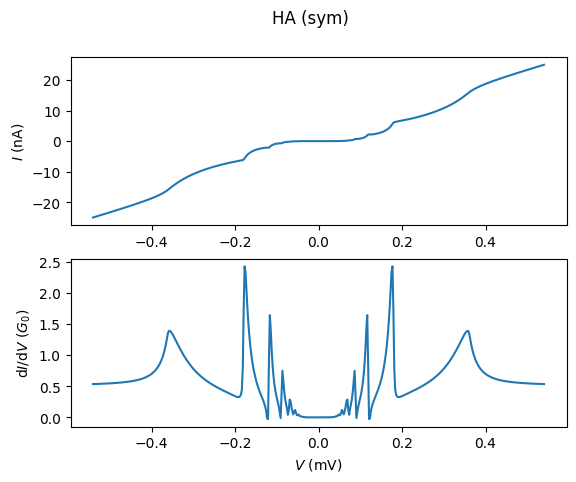

In [16]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_ha)
ax_didv.plot(V_mV, dIdV_ha)
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")
fig.suptitle("HA (sym)")

In [17]:
from theory.models.ha_sym import get_I_nA_nonuniform as get_I_nA_ha_sym_nonuniform

V_mV_2 = np.concatenate((np.linspace(0, 0.4, 401), np.linspace(0.4, 0.8, 41)))
I_nA_ha_2 = get_I_nA_ha_sym_nonuniform(
    V_mV=V_mV_2,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
# dIdV_ha = np.gradient(I_nA_ha, V_mV) / G_0_muS

cached values: 44/442


Text(0.5, 0.98, 'HA (sym) (non-uniform)')

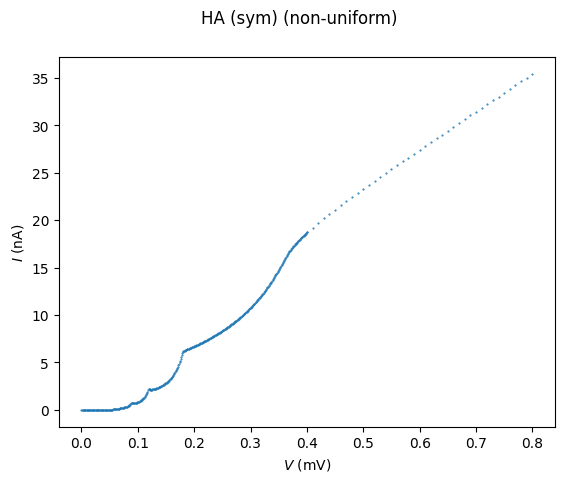

In [18]:
fig, ax_iv = plt.subplots(nrows=1, ncols=1)
ax_iv.plot(V_mV_2, I_nA_ha_2, ".", ms=1)
ax_iv.set_ylabel("$I$ (nA)")
ax_iv.set_xlabel("$V$ (mV)")
fig.suptitle("HA (sym) (non-uniform)")

In [19]:
from theory.models.fcs import get_I_nA as get_I_nA_fcs

I_nA_fcs = get_I_nA_fcs(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_fcs = np.gradient(I_nA_fcs, V_mV, axis=0) / G_0_muS

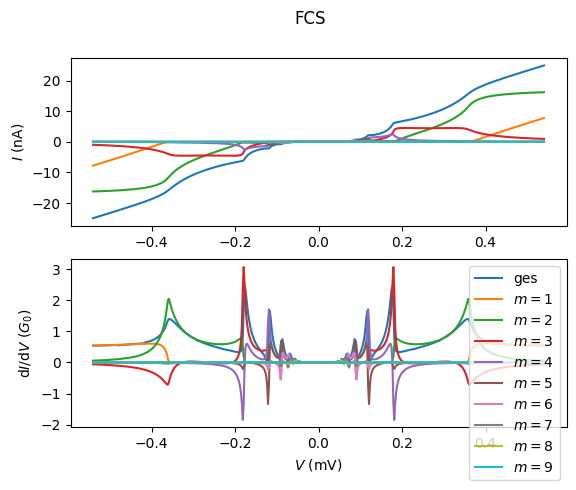

In [20]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_fcs[:, 0], label=f"ges")
ax_didv.plot(V_mV, dIdV_fcs[:, 0], label=f"ges")
for m in range(1, 10):
    ax_iv.plot(V_mV, I_nA_fcs[:, m], label=f"$m = {m}$")
    ax_didv.plot(V_mV, dIdV_fcs[:, m], label=f"$m = {m}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")
fig.suptitle("FCS")

ax_didv.legend()

In [21]:
from theory.models.fcs_pbar import get_I_nA as get_I_nA_fcs_pbar

I_nA_fcs_pbar = get_I_nA_fcs_pbar(
    V_mV=V_mV,
    Delta_meV=Delta_meV,
    tau=tau,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_fcs_pbar = np.gradient(I_nA_fcs_pbar, V_mV, axis=0) / G_0_muS

cached values: 252/252


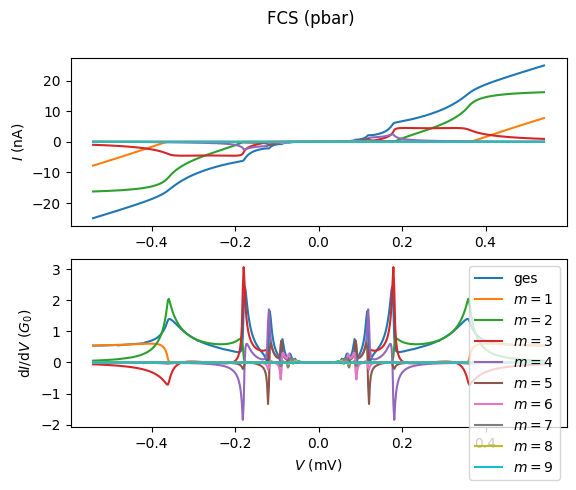

In [22]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_fcs_pbar[:, 0], label=f"ges")
ax_didv.plot(V_mV, dIdV_fcs_pbar[:, 0], label=f"ges")
for m in range(1, 10):
    ax_iv.plot(V_mV, I_nA_fcs_pbar[:, m], label=f"$m = {m}$")
    ax_didv.plot(V_mV, dIdV_fcs_pbar[:, m], label=f"$m = {m}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")
fig.suptitle("FCS (pbar)")
ax_didv.legend()

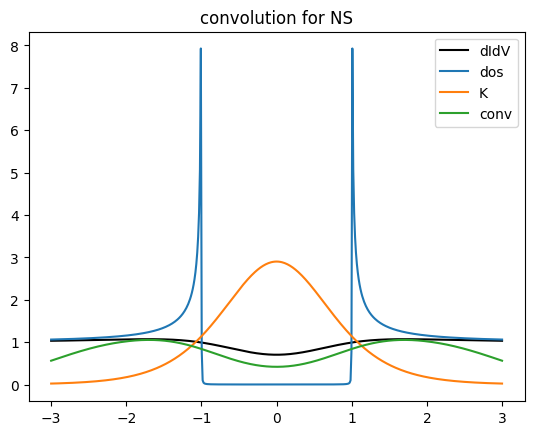

In [ ]:
# show convolution
from theory.models.bcs import N_of_E, f_of_E, get_I_nA


def K_of_E(E_meV, T_K):
    return -1 * np.gradient(f_of_E(E_meV=E_meV, T_K=T_K), E_meV)


N_S = N_of_E(E_meV=V_mV, Delta_meV=Delta_T_meV, gamma_meV=gamma_meV)v
G_NS = np.convolve(N_S, K, mode="same") * dV_mV

I_NS = get_I_nA(
    V_mV=V_mV,
    Delta_meV=(0.0, Delta_meV),
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_NS = np.gradient(I_NS, V_mV) / G_0_muS / G_N

plt.plot(V, dIdV_NS, "k", label="dIdV")
plt.plot(V, N_S, label="dos")
plt.plot(V, K, label="K")
plt.plot(V, G_NS, label="conv")
plt.title("convolution for NS")
plt.legend()

In [ ]:
from theory.utilities.constants import G_0_muS

V = np.linspace(-10, 10, 10001, dtype="float64")
dV = (np.max(V) - np.min(V)) / (V.shape[0] - 1)

tau = 0.5
G_N = 0.1
Delta_meV = 0.18
gamma_meV = 1e-4  # 1e-1
T_K = 0.5
A_mV = 0.1
nu_GHz = 20.0

V_mV = V * Delta_meV
dV_mV = dV * Delta_meV

from theory.models.bcs import Delta_meV_of_T

Delta_T_meV = Delta_meV_of_T(Delta_meV=Delta_meV, T_K=T_K)
Delta2_T_meV = Delta_meV_of_T(Delta_meV=Delta_meV * 0.5, T_K=T_K)

In [ ]:
from theory.models.bcs_jnp import get_I_nA

I_SS = get_I_nA(
    V_mV=V_mV,
    Delta_meV=(Delta_meV, Delta_meV * 0.5),
    G_N=G_N,
    T_K=T_K,
    gamma_meV=gamma_meV,
)
dIdV_SS = np.gradient(I_SS, V_mV) / G_0_muS / G_N

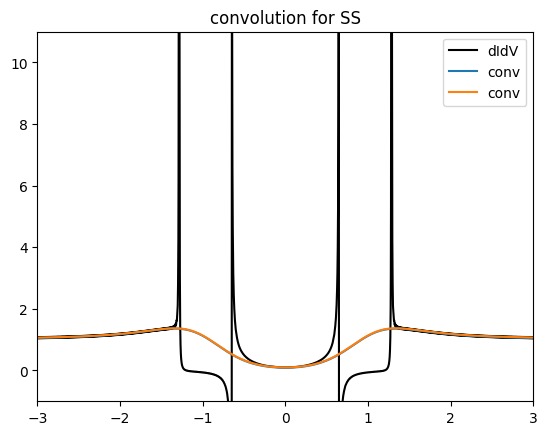

In [196]:
# show convolution SS
from theory.models.bcs import N_of_E, f_of_E

f_1 = f_of_E(E_meV=+V_mV, T_K=T_K)
N_1 = N_of_E(E_meV=+V_mV, Delta_meV=Delta_T_meV, gamma_meV=gamma_meV)
f_2 = f_of_E(E_meV=+V_mV, T_K=T_K)
N_2 = N_of_E(E_meV=+V_mV, Delta_meV=Delta2_T_meV, gamma_meV=gamma_meV)
N_2 = np.ones_like(V_mV)

dN_1 = np.gradient(N_1, V_mV)
dN_2 = np.gradient(N_2, V_mV)
df_1 = np.gradient(f_1, V_mV)
df_2 = np.gradient(f_2, V_mV)

G_SS = +np.convolve(N_2 * (1 - f_2), N_1, mode="same") * dV_mV
G_SS -= np.convolve(N_1 * (0 + f_1), N_2, mode="same") * dV_mV
G_SS *= G_0_muS * G_N

G_SS = np.gradient(G_SS, V_mV) / G_0_muS / G_N
# G_SS = np.abs(G_SS)

g_ss = +np.convolve(N_2 * (1 - f_2), dN_1, mode="same") * dV_mV
g_ss -= np.convolve(N_1 * (0 + f_1), dN_2, mode="same") * dV_mV
g_ss += 1

g_s = +np.convolve(dN_2 * (1 - f_2) + N_2 * -df_1, N_1, mode="same") * dV_mV
g_s -= np.convolve(dN_1 * (0 + f_1) + N_1 * +df_2, N_2, mode="same") * dV_mV
g_s -= 1
# g_s = np.abs(g_s)

# g_s2 = +np.convolve(dN_2 * f_2, N_1, mode="same") * dV_mV
# g_s2 -= np.convolve(dN_1 * f_1, N_2, mode="same") * dV_mV
# g_s2 -= 1

# plt.plot(V, I_SS)
plt.plot(V, dIdV_SS, "k", label="dIdV")
# plt.plot(V, N_S1, label="dos")
# plt.plot(V, N_S2, label="dos")
# plt.plot(V, I_SS, label="I_theo")
# plt.plot(V, G_SS, label="conv")
plt.plot(V, g_ss, label="conv")
plt.plot(V, g_s, label="conv")
# plt.plot(V, g_s2, label="conv")
# plt.plot(V, np.convolve(dN_2 * f_2 + N_2 * df_2, N_1, mode="same") * dV_mV)
# plt.plot(V, dN_1, label="conv")
plt.title("convolution for SS")
plt.xlim(-3, 3)
plt.ylim(-1, 11)
plt.legend()

# Irradiation

In [128]:
from theory.models.ns import get_I_nA as get_I_nA_ns

I_nA_NS = get_I_nA_ns(
    V_mV=V_mV,
    G_N=G_N,
    tau=tau,
    T_K=T_K,
    Delta_meV=Delta_meV,
    gamma_meV=gamma_meV,
    A_mV=A_mV,
    nu_GHz=nu_GHz,
)
dIdV_nA_NS = np.gradient(I_nA_NS, V_mV, axis=0) / G_0_muS

Text(0.5, 0.98, 'NS + irradiation')

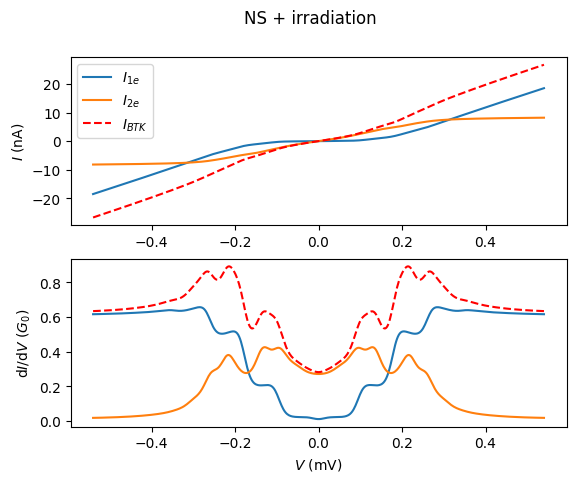

In [129]:
fig, [ax_iv, ax_didv] = plt.subplots(nrows=2, ncols=1)
ax_iv.plot(V_mV, I_nA_NS[:, 1], label="$I_{1e}$")
ax_iv.plot(V_mV, I_nA_NS[:, 2], label="$I_{2e}$")
ax_iv.plot(V_mV, I_nA_NS[:, 0], "r--", label="$I_{BTK}$")
ax_didv.plot(V_mV, dIdV_nA_NS[:, 1], label="$I_{1e}$")
ax_didv.plot(V_mV, dIdV_nA_NS[:, 2], label="$I_{2e}$")
ax_didv.plot(V_mV, dIdV_nA_NS[:, 0], "r--", label="$I_{BTK}$")
# ax_iv.plot(V_mV, I_nA_NS[:], "r--", label="$I_{BTK}$")
# ax_didv.plot(V_mV, dIdV_nA_NS[:], "r--", label="$I_{BTK}$")
ax_iv.set_ylabel("$I$ (nA)")
ax_didv.set_ylabel("d$I/$d$V$ ($G_0$)")
ax_didv.set_xlabel("$V$ (mV)")

# ax_didv.set_ylim(0, 3 * tau)
ax_iv.legend()
fig.suptitle("NS + irradiation")